<a id="1"></a>
# ⬇️ `Importing Libraries`

In [1]:
#importing Neccessay Libraries
import pandas as pd #library for dataframe handling
import numpy as np #Library for calculations
import nltk #library for natural language toolkit
from sklearn.feature_extraction.text import TfidfVectorizer #library for vectorizing dataframe
from nltk.tokenize import word_tokenize #library for Tokenizing
from nltk.stem import PorterStemmer #library for Stemming
from nltk.stem.porter import PorterStemmer #library for Stemming
from wordcloud import WordCloud,STOPWORDS #library for generating wordcloud
from nltk.corpus import stopwords #library for checking comonly used words
stop_words = set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer #library for lemmetization
from nltk.tokenize import word_tokenize,sent_tokenize #library for lemmetization
from nltk.stem import LancasterStemmer #library for lemmetization
from textblob import TextBlob,Word #library for sentiment classification
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import re #library for regular expression
import warnings #library for stoping Warnings
warnings.filterwarnings('ignore')
from nltk.tokenize.toktok import ToktokTokenizer

<a id="2"></a>
# 🚢 `Loading Dataset`

In [59]:
#loading dataset
df=pd.read_csv('British_airways.csv',encoding='utf-8',)
df.head() #displaying first five rows

,Unnamed: 0,reviews,stars,date,country
0,0,✅ Trip Verified | I will never fly British Ai...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,13th April 2023,United States
1,1,✅ Trip Verified | Worst aircraft I have ever ...,2,12th April 2023,United Kingdom
2,2,✅ Trip Verified | I enjoyed my flight. The bo...,1,11th April 2023,United Kingdom
3,3,✅ Trip Verified | Why do you make it so hard? ...,9,10th April 2023,United Kingdom
4,4,✅ Trip Verified | After several delays and ca...,5,9th April 2023,United States


In [60]:
df.tail() #displaying  Last rows

,Unnamed: 0,reviews,stars,date,country
3495,3495,Flew from San Francisco to Heathrow London. Fl...,3,10th May 2014,United Kingdom
3496,3496,I flew Singapore to Sydney with them recently ...,1,8th May 2014,Australia
3497,3497,Lanzarote to Gatwick on 13th April. Flight its...,2,7th May 2014,United Kingdom
3498,3498,LGW-VRN-LGW both in Club Europe. Was offered a...,6,7th May 2014,United Kingdom
3499,3499,6 May 2014: Las Vegas to Gatwick. Boeing 777. ...,6,7th May 2014,United Kingdom


In [61]:
df=df.drop('Unnamed: 0',axis=1)

<a id="3"></a>
# 🧭 `Data Exploration`

In [62]:
df.shape #dimensions of the dataset

(3500, 4)

In [63]:
df.describe() #Stastastical description of dataset

,reviews,stars,date,country
count,3500,3500,3500,3498
unique,3492,12,1690,69
top,Travelled from Heathrow to Washington in April...,1,19th January 2015,United Kingdom
freq,2,768,26,2224


In [64]:
df.info() #Checking for datatypes and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  3500 non-null   object
 1   stars    3500 non-null   object
 2   date     3500 non-null   object
 3   country  3498 non-null   object
dtypes: object(4)
memory usage: 109.5+ KB


In [76]:
#filtering unwanted text in data
def data_processing(text):
    text = re.sub('@[\w]+','',text) #Removing twitter username
    text = re.sub(r'\bRT\b','',text) #Removing  retweet
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE) #Removing  url
    text = re.sub(r':','',text) #Removing  semicolon
    text = re.sub(r'#','',text)  #Removing  hashtags
    text = re.sub(r'…','',text)  #Removing  special Character
    text = re.sub(r'\s ','',text) #Removing  blank space
    text = re.sub(r'✅ Trip Verified |'+'✅ Verified Review |'+'|','',text)
    text_tokens = word_tokenize(text) # tokenization o text
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [78]:
df['reviews_filter'] = df['reviews'].apply(data_processing)# applying data Preprocessing
df['stars'] = df['stars'].apply(data_processing)
df.head()

,reviews,stars,date,country,reviews_filter
0,✅ Trip Verified | I will never fly British Ai...,5,13th April 2023,United States,"|I never fly British Airways . To start , plan..."
1,✅ Trip Verified | Worst aircraft I have ever ...,2,12th April 2023,United Kingdom,|Worst aircraft I ever flown . The seats cramp...
2,✅ Trip Verified | I enjoyed my flight. The bo...,1,11th April 2023,United Kingdom,|I enjoyed flight . The boarding swift service...
3,✅ Trip Verified | Why do you make it so hard? ...,9,10th April 2023,United Kingdom,"| Why make hard ? After lounge experience , st..."
4,✅ Trip Verified | After several delays and ca...,5,9th April 2023,United States,"|After several delays canceled flights , final..."


In [79]:
#Downloading Stopwords
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [80]:
# function for filtering stop Words
from nltk.corpus import stopwords
from nltk.tokenize import  sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
stop_words = set(stopwords.words('english'))

stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text,is_lower_case=False):
    tokens =  sent_tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text


In [81]:
#filtering stop words
df['reviews_filter'] = df['reviews_filter'].apply(remove_stopwords)
df.head(5)

,reviews,stars,date,country,reviews_filter
0,✅ Trip Verified | I will never fly British Ai...,5,13th April 2023,United States,"|I never fly British Airways . To start , plan..."
1,✅ Trip Verified | Worst aircraft I have ever ...,2,12th April 2023,United Kingdom,|Worst aircraft I ever flown . The seats cramp...
2,✅ Trip Verified | I enjoyed my flight. The bo...,1,11th April 2023,United Kingdom,|I enjoyed flight . The boarding swift service...
3,✅ Trip Verified | Why do you make it so hard? ...,9,10th April 2023,United Kingdom,"| Why make hard ? After lounge experience , st..."
4,✅ Trip Verified | After several delays and ca...,5,9th April 2023,United States,"|After several delays canceled flights , final..."


In [82]:
#Removing Duplicates and extra columns
df = df.drop_duplicates('reviews_filter')

In [83]:
# Function for text stemming
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [84]:
# Applying Stemming function
df['reviews_filter'] = df['reviews_filter'].apply(lambda x: stemming(x))
df.head()

,reviews,stars,date,country,reviews_filter
0,✅ Trip Verified | I will never fly British Ai...,5,13th April 2023,United States,"|I never fly British Airways . To start , plan..."
1,✅ Trip Verified | Worst aircraft I have ever ...,2,12th April 2023,United Kingdom,|Worst aircraft I ever flown . The seats cramp...
2,✅ Trip Verified | I enjoyed my flight. The bo...,1,11th April 2023,United Kingdom,|I enjoyed flight . The boarding swift service...
3,✅ Trip Verified | Why do you make it so hard? ...,9,10th April 2023,United Kingdom,"| Why make hard ? After lounge experience , st..."
4,✅ Trip Verified | After several delays and ca...,5,9th April 2023,United States,"|After several delays canceled flights , final..."


In [85]:
# Function for Lemmatization
def simpleLemmatization(text):
    lemma = nltk.stem.WordNetLemmatizer()
    text = ' '.join([lemma.lemmatize(word) for word in text.split()])
    return text

df['reviews_filter'] = df['reviews_filter'].apply(simpleLemmatization)
df.head(5)

,reviews,stars,date,country,reviews_filter
0,✅ Trip Verified | I will never fly British Ai...,5,13th April 2023,United States,"|I never fly British Airways . To start , plan..."
1,✅ Trip Verified | Worst aircraft I have ever ...,2,12th April 2023,United Kingdom,|Worst aircraft I ever flown . The seat crampe...
2,✅ Trip Verified | I enjoyed my flight. The bo...,1,11th April 2023,United Kingdom,|I enjoyed flight . The boarding swift service...
3,✅ Trip Verified | Why do you make it so hard? ...,9,10th April 2023,United Kingdom,"| Why make hard ? After lounge experience , st..."
4,✅ Trip Verified | After several delays and ca...,5,9th April 2023,United States,"|After several delay canceled flight , finally..."


In [86]:
# Function for text Polarity
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [87]:
# applying text Polarity
df['polarity'] = df['reviews_filter'].apply(polarity)
df.head()

,reviews,stars,date,country,reviews_filter,polarity
0,✅ Trip Verified | I will never fly British Ai...,5,13th April 2023,United States,"|I never fly British Airways . To start , plan...",-0.080556
1,✅ Trip Verified | Worst aircraft I have ever ...,2,12th April 2023,United Kingdom,|Worst aircraft I ever flown . The seat crampe...,-0.181944
2,✅ Trip Verified | I enjoyed my flight. The bo...,1,11th April 2023,United Kingdom,|I enjoyed flight . The boarding swift service...,0.275000
3,✅ Trip Verified | Why do you make it so hard? ...,9,10th April 2023,United Kingdom,"| Why make hard ? After lounge experience , st...",0.064470
4,✅ Trip Verified | After several delays and ca...,5,9th April 2023,United States,"|After several delay canceled flight , finally...",0.047273


In [88]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [89]:
# polarity sentiment labeling
df['sentiment'] = df['polarity'].apply(sentiment)
df.head()

,reviews,stars,date,country,reviews_filter,polarity,sentiment
0,✅ Trip Verified | I will never fly British Ai...,5,13th April 2023,United States,"|I never fly British Airways . To start , plan...",-0.080556,Negative
1,✅ Trip Verified | Worst aircraft I have ever ...,2,12th April 2023,United Kingdom,|Worst aircraft I ever flown . The seat crampe...,-0.181944,Negative
2,✅ Trip Verified | I enjoyed my flight. The bo...,1,11th April 2023,United Kingdom,|I enjoyed flight . The boarding swift service...,0.275000,Positive
3,✅ Trip Verified | Why do you make it so hard? ...,9,10th April 2023,United Kingdom,"| Why make hard ? After lounge experience , st...",0.064470,Positive
4,✅ Trip Verified | After several delays and ca...,5,9th April 2023,United States,"|After several delay canceled flight , finally...",0.047273,Positive


<AxesSubplot:xlabel='sentiment', ylabel='count'>

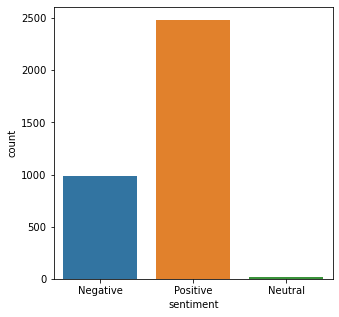

In [90]:
#Plotting sentiment in bargraphh
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = df)

In [91]:
pos_tweets =df[df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,reviews,stars,date,country,reviews_filter,polarity,sentiment
3176,Very impressed with Premium Economy on BA Sydn...,1,22nd October 2014,Australia,Very impressed Premium Economy BA Sydney Heath...,0.800000,Positive
157,✅ Trip Verified | For this 5 hour 15 min flig...,2,22nd July 2022,United Kingdom,"|For 5 hour 15 min flight , given bag potato c...",0.800000,Positive
603,✅ Trip Verified | Edinburgh to Kuala Lumpur v...,8,28th August 2019,Malaysia,|Edinburgh Kuala Lumpur via London . I returne...,0.716667,Positive
2604,Ground handling is not great at Bari but once ...,7,20th August 2015,United Kingdom,Ground handling great Bari board quickly forgo...,0.707222,Positive
334,✅ Trip Verified | The crew at Denver airport ...,2,4th October 2021,United States,|The crew Denver airport top notch ! So impres...,0.706250,Positive


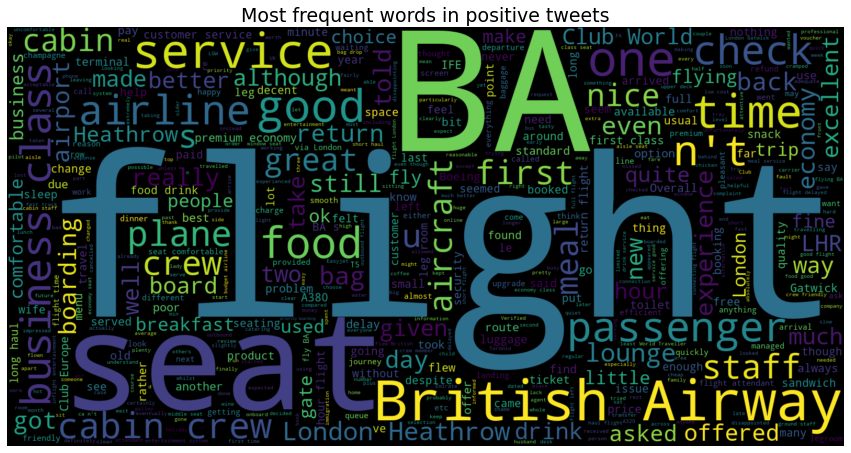

In [92]:
text = ' '.join([word for word in pos_tweets['reviews_filter']])
plt.figure(figsize=(15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [93]:
neg_tweets =df[df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,reviews,stars,date,country,reviews_filter,polarity,sentiment
1667,✅ Verified Review | Aberdeen to Paris via Lon...,3,4th February 2017,United Kingdom,|Aberdeen Paris via London Heathrow . British ...,-6.938894e-18,Negative
587,✅ Trip Verified | Hong Kong to London. An ema...,1,15th September 2019,United Kingdom,|Hong Kong London . An email 25th August advis...,-1.831502e-04,Negative
1430,✅ Verified Review | London to Boston return i...,2,12th June 2017,United Kingdom,|London Boston return premium economy . Anothe...,-2.380952e-04,Negative
2104,✅ Verified Review | London Heathrow to Seoul ...,1,10th May 2016,United Kingdom,|London Heathrow Seoul Incheon British Airways...,-4.040404e-04,Negative
1162,✅ Trip Verified | London to New York. Aircraf...,2,26th December 2017,United Kingdom,"|London New York . Aircraft dated , IFE poor ,...",-6.313131e-04,Negative


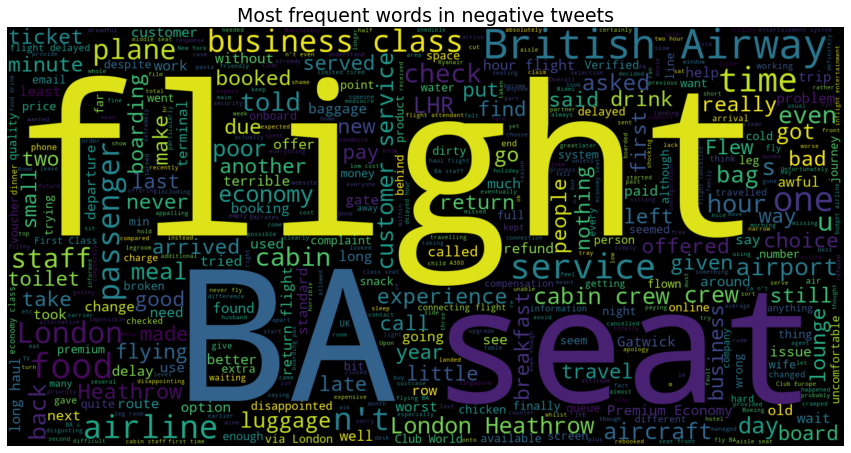

In [94]:
text = ' '.join([word for word in neg_tweets['reviews_filter']])
plt.figure(figsize=(15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [95]:
neutral_tweets = df[df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,reviews,stars,date,country,reviews_filter,polarity,sentiment
107,✅ Trip Verified | Beyond disgusted with the fa...,1,5th November 2022,United Arab Emirates,| Beyond disgusted fact baggage yet delivered ...,0.0,Neutral
927,✅ Trip Verified | Rome to London. Our flight ...,4,28th August 2018,United States,|Rome London . Our flight delayed Rome hour co...,0.0,Neutral
3242,Orlando Florida (MCO) - London Gatwick (LGW). ...,1,18th September 2014,United States,Orlando Florida ( MCO ) - London Gatwick ( LGW...,0.0,Neutral
2925,I took a flight from Gatwick to Barcelona. Alt...,5,9th March 2015,United Kingdom,I took flight Gatwick Barcelona . Although BA ...,0.0,Neutral
2690,Having encouraged passengers to check-in onlin...,1,12th July 2015,Thailand,Having encouraged passenger check-in online sa...,0.0,Neutral


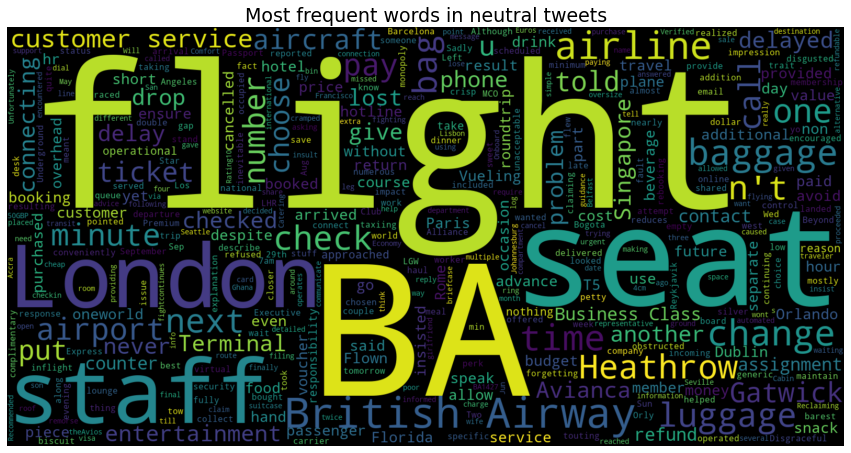

In [96]:
text = ' '.join([word for word in neutral_tweets['reviews_filter']])
plt.figure(figsize=(15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [98]:
df['stars'].value_counts()

1       767
2       393
3       387
8       353
10      309
9       301
7       301
5       261
4       234
6       181
None      5
Name: stars, dtype: int64

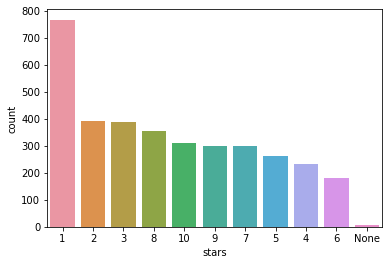

In [101]:
sns.countplot(data=df,
              x='stars',
              order=df.stars.value_counts().index)
plt.show()

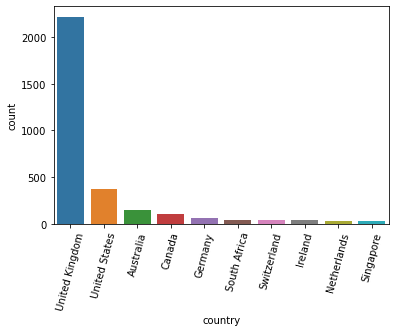

In [128]:

sns.countplot(data=df,
              x='country',
              order=df.country.value_counts().nlargest(10).index)
plt.xticks(rotation=75)
plt.show()

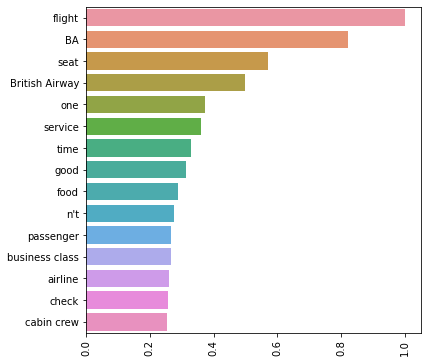

In [134]:
from wordcloud import WordCloud
from collections import Counter
text = ' '.join([word for word in pos_tweets['reviews_filter']])
# generate the word cloud
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)

# count the words in the word cloud
word_count = Counter(wordcloud.words_)

# print the word count
from nltk.probability import FreqDist
nlp_words=FreqDist(word_count).most_common(15)
all_fdist = pd.Series(dict(nlp_words))
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(6,6
                               ))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(y=all_fdist.index, x=all_fdist.values, ax=ax)
plt.xticks(rotation=90)
plt.show()

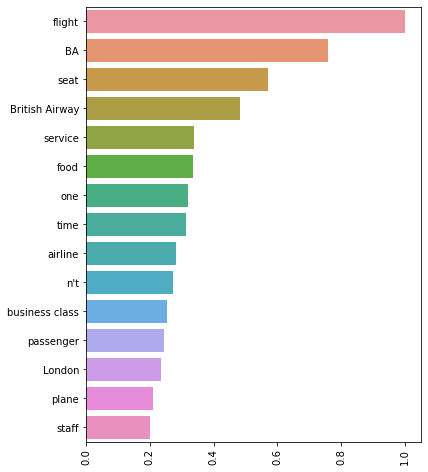

In [135]:
from wordcloud import WordCloud
from collections import Counter
text = ' '.join([word for word in neg_tweets['reviews_filter']])
# generate the word cloud
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)

# count the words in the word cloud
word_count = Counter(wordcloud.words_)

# print the word count
from nltk.probability import FreqDist
nlp_words=FreqDist(word_count).most_common(15)
all_fdist = pd.Series(dict(nlp_words))
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(6,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(y=all_fdist.index, x=all_fdist.values, ax=ax)
plt.xticks(rotation=90)
plt.show()

In [136]:
df.head()

,reviews,stars,date,country,reviews_filter,polarity,sentiment
0,✅ Trip Verified | I will never fly British Ai...,5,13th April 2023,United States,"|I never fly British Airways . To start , plan...",-0.080556,Negative
1,✅ Trip Verified | Worst aircraft I have ever ...,2,12th April 2023,United Kingdom,|Worst aircraft I ever flown . The seat crampe...,-0.181944,Negative
2,✅ Trip Verified | I enjoyed my flight. The bo...,1,11th April 2023,United Kingdom,|I enjoyed flight . The boarding swift service...,0.275000,Positive
3,✅ Trip Verified | Why do you make it so hard? ...,9,10th April 2023,United Kingdom,"| Why make hard ? After lounge experience , st...",0.064470,Positive
4,✅ Trip Verified | After several delays and ca...,5,9th April 2023,United States,"|After several delay canceled flight , finally...",0.047273,Positive
